In [1]:
# 1) Correlation measures two variables and how much linear relation there is between those variables. This should not be mistaken for a cause and effect 
#    relationship. When measuring correlation, we generally say that as x increases, y increases; we can also say any variation of increase and decrease.

# 2) It is important to visualize the data with a scatterplot before computing correlation because it is possible that the variables are correlated, but it 
#    would not make sense to say that practically. Visualizing our data this way also allows us to determine if there are any outliers, which will allow us
#    to more accurately measure our correlation. 

# 3) Scatterplot A - r = -0.72
#    Scatterplot B - r = 0.65
#    Scatterplot C - r = -0.02 
#    Scatterplot D - r = 0.84

# 4a) (((2)*(19027804)) - (5318)*(3578)) / sqrt([(2)*(28281124) - (5318)^2 ]*[(6)*(12802084) - (3578)^2])
#     r = 0.44
#     ME = 2 * sqrt((1 - (0.44)^2) / 2)
#     ME = 1.269

#     A correlation coefficient of 0.44 tells us that 44% of our variation in result can be attributed to surface type.

#     We can determine that this correlation is not significant because our interval of (0.44 +/- 1.269) contains zero. 


#  b) alpha = ad/bc
#     alpha = 3658*863 / 2715*1660
#     alpha = 0.700

#     The odds of Nadal winning is about 1.4 times higher if he is on a non-clay surface than if he is on a clay surface.

#     We can determine that there is a low degree of association because our alpha is far away from 0. 


#   c) q = (a - 1) / (a + 1)
#      q = (0.700 - 1) / (0.700 + 1)
#      q = -0.176

#      A q of -0.176 tells us that there is a slight negative relationship between result and surface type.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing data
mlb = pd.read_csv('Teams.csv')
mlb.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [44]:
# creating run differential
mlb['RD'] = mlb['R'] - mlb['RA']

# creating win percentage
mlb['Wpct'] = mlb['W'] / (mlb['W'] + mlb['L'])

In [47]:
# aggregating data
mlb_agg = mlb[['yearID', 'RD', 'Wpct']]
mlb_agg.head()

,yearID,RD,Wpct
0,1871,98,0.666667
1,1871,61,0.678571
2,1871,-92,0.344828
3,1871,-106,0.368421
4,1871,-11,0.484848


In [48]:
# selecting when yearID >= 2001
mlb_agg = mlb_agg[mlb_agg['yearID'] >= 2001]
mlb_agg.head()

,yearID,RD,Wpct
2355,2001,-39,0.462963
2356,2001,141,0.567901
2357,2001,86,0.543210
2358,2001,-142,0.391304
2359,2001,27,0.509317


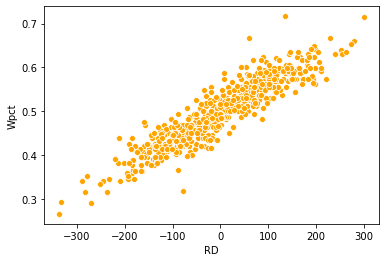

In [54]:
# creating a scatterplot between RD and Wpct
sns.scatterplot(x = 'RD', y = 'Wpct', color = 'orange', data = mlb_agg)

# Our plot shows a positive linear relationship between run differential and win percentage.

In [61]:
# computing correlation
mlb_agg[['RD', 'Wpct']].corr()

,RD,Wpct
RD,1.000000,0.924967
Wpct,0.924967,1.000000


In [64]:
r = 0.925
n = mlb_agg.shape[0]
ME = 2*np.sqrt((1-r**2) / n)
print('The Margin of Error is equal to:', ME)

# We can determine that our correlation is significant because our interval of (r +/- ME) does not contain zero. 

The Margin of Error is equal to: 0.031024184114977132
